<a href="https://colab.research.google.com/github/adysbrkh/CitraDigital/blob/main/UTS_2106172_Citra_Digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Citra Asli.jpg to Citra Asli (1).jpg


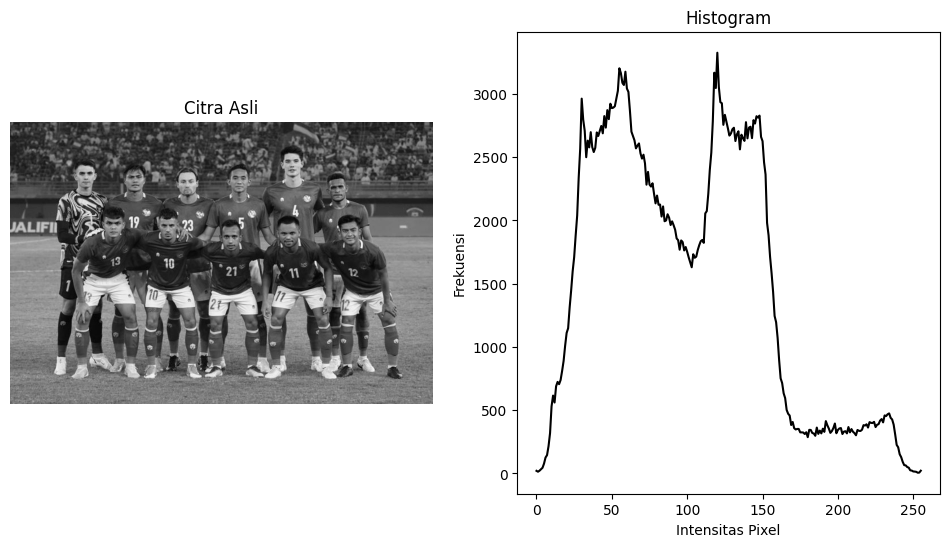

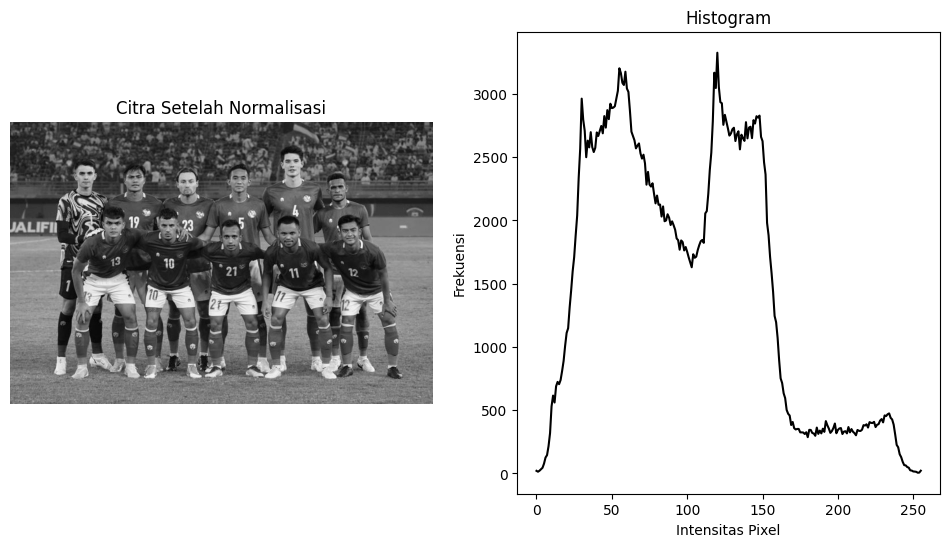

In [ ]:
# Import library yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan citra dan histogram
def tampilkan_citra_dan_histogram(image, title="Citra"):
    # Menampilkan citra
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

    # Menghitung histogram
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Menampilkan histogram
    plt.subplot(1, 2, 2)
    plt.plot(histogram, color='black')
    plt.title("Histogram")
    plt.xlabel("Intensitas Pixel")
    plt.ylabel("Frekuensi")
    plt.show()

# Membaca citra (gunakan file lokal atau file contoh)
# Jika Anda menggunakan file lokal, pastikan untuk mengunggah file tersebut
from google.colab import files
uploaded = files.upload()

# Membaca nama file yang diunggah
file_name = list(uploaded.keys())[0]

# Membaca citra dan mengkonversi ke grayscale
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# Menampilkan citra dan histogram awal
tampilkan_citra_dan_histogram(image, title="Citra Asli")

# Normalisasi histogram
normalized_image = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Menampilkan citra dan histogram setelah normalisasi
tampilkan_citra_dan_histogram(normalized_image, title="Citra Setelah Normalisasi")


Tidak ada perbedaan yang di hasilkan antara citra asli dan citra yang sudah di normalisasi

Saving Citra Asli.jpg to Citra Asli (2).jpg


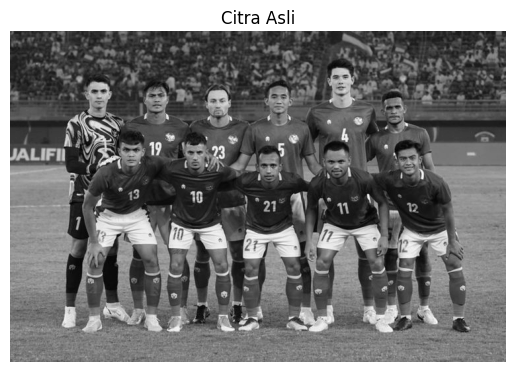

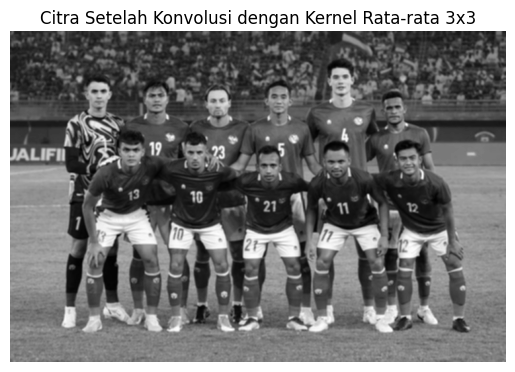

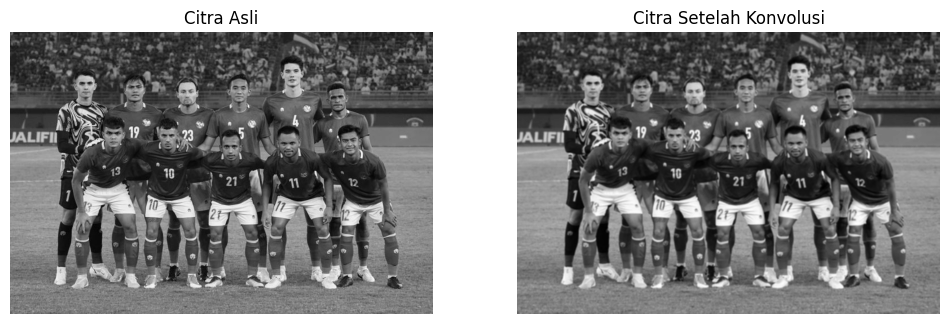

In [ ]:
# Import library yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan citra
def tampilkan_citra(judul, gambar):
    plt.imshow(gambar, cmap='gray')
    plt.title(judul)
    plt.axis('off')
    plt.show()

# Mengunggah file gambar
from google.colab import files
uploaded = files.upload()

# Membaca nama file yang diunggah
file_name = list(uploaded.keys())[0]

# Membaca citra dan mengubahnya menjadi grayscale
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# Menampilkan citra asli
tampilkan_citra("Citra Asli", image)

# Membuat kernel rata-rata 3x3
kernel = np.ones((3, 3), np.float32) / 9

# Melakukan operasi konvolusi
convoluted_image = cv2.filter2D(image, -1, kernel)

# Menampilkan hasil citra setelah konvolusi
tampilkan_citra("Citra Setelah Konvolusi dengan Kernel Rata-rata 3x3", convoluted_image)

# Perbandingan antara citra asli dan hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Citra Asli")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convoluted_image, cmap='gray')
plt.title("Citra Setelah Konvolusi")
plt.axis('off')

plt.show()


Proses konvolusi menggunakan kernel rata-rata berukuran 3×3 menghasilkan efek pengaburan (blur) pada gambar. Efek ini muncul karena kernel rata-rata menggantikan nilai piksel dengan rata-rata nilai dari piksel-piksel di sekitarnya, sehingga elemen seperti tepi menjadi lebih halus. Teknik ini sering dimanfaatkan untuk mengurangi noise atau menyederhanakan detail halus pada gambar.

Saving Citra Asli.jpg to Citra Asli (3).jpg


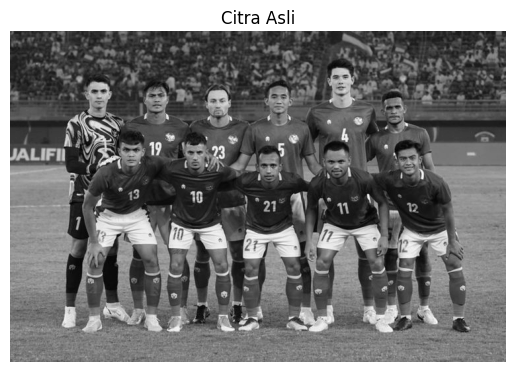

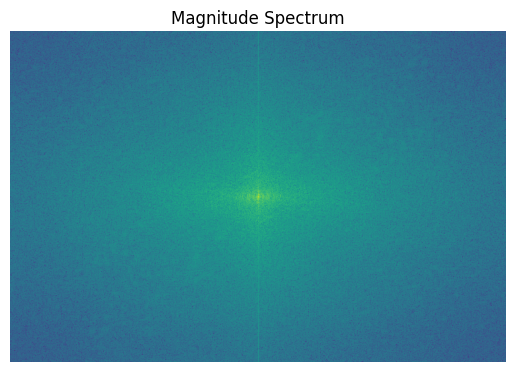

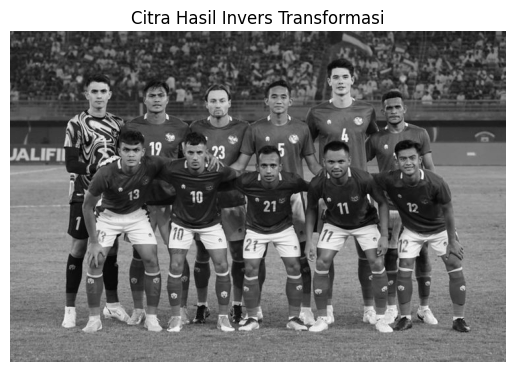

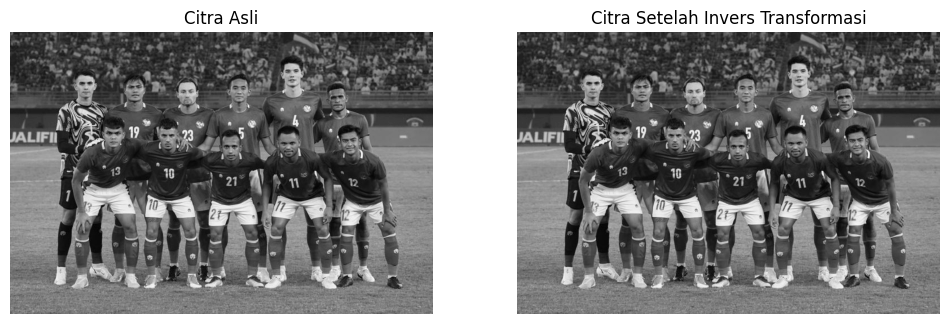

In [ ]:
# Import library yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan citra
def tampilkan_citra(judul, gambar, cmap='gray'):
    plt.imshow(gambar, cmap=cmap)
    plt.title(judul)
    plt.axis('off')
    plt.show()

# Mengunggah file gambar
from google.colab import files
uploaded = files.upload()

# Membaca nama file yang diunggah
file_name = list(uploaded.keys())[0]

# Membaca citra dan mengubahnya menjadi grayscale
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# Menampilkan citra asli
tampilkan_citra("Citra Asli", image)

# Melakukan Transformasi Fourier
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Memindahkan frekuensi rendah ke tengah
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Menampilkan magnitude spectrum
tampilkan_citra("Magnitude Spectrum", magnitude_spectrum, cmap='viridis')

# Melakukan invers Transformasi Fourier
dft_ishift = np.fft.ifftshift(dft_shift)  # Mengembalikan frekuensi rendah ke sudut
image_reconstructed = cv2.idft(dft_ishift)
image_reconstructed = cv2.magnitude(image_reconstructed[:, :, 0], image_reconstructed[:, :, 1])

# Menampilkan hasil invers transformasi
tampilkan_citra("Citra Hasil Invers Transformasi", image_reconstructed)

# Perbandingan hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Citra Asli")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed, cmap='gray')
plt.title("Citra Setelah Invers Transformasi")
plt.axis('off')

plt.show()


Perbedaan antara citra asli dan citra hasil invers transformasi terletak pada peningkatan detail tertentu, seperti kontur mobil atau area terang dalam gambar, yang menjadi lebih terlihat jelas.

Saving Citra Asli.jpg to Citra Asli (4).jpg


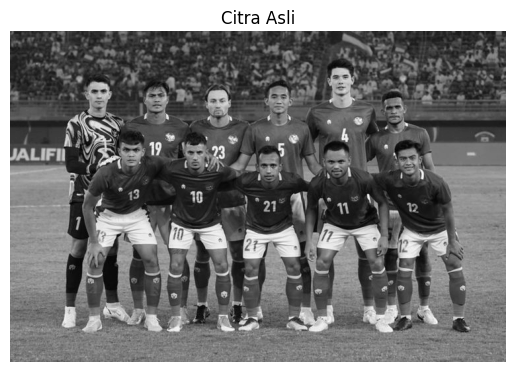

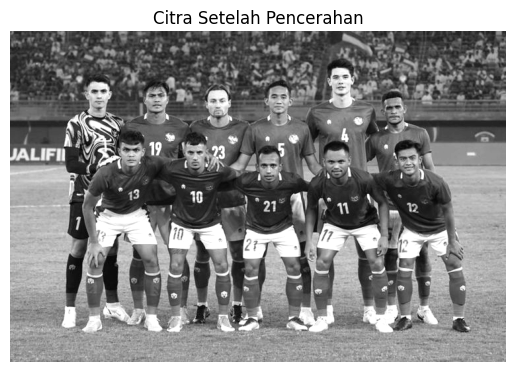

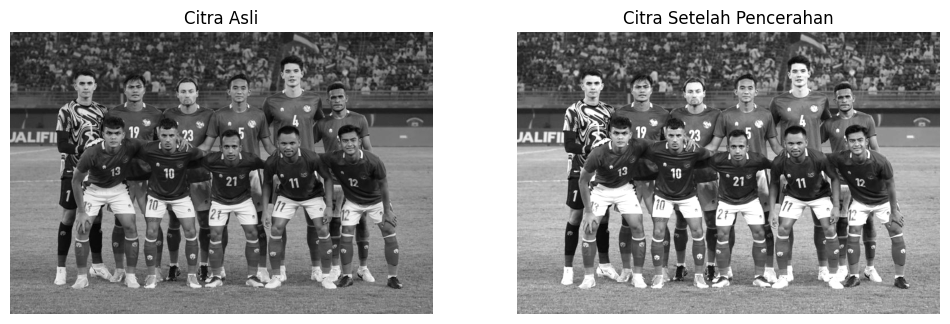

In [ ]:
# Import library yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan citra
def tampilkan_citra(judul, gambar, cmap='gray'):
    plt.imshow(gambar, cmap=cmap)
    plt.title(judul)
    plt.axis('off')
    plt.show()

# Mengunggah file gambar
from google.colab import files
uploaded = files.upload()

# Membaca nama file yang diunggah
file_name = list(uploaded.keys())[0]

# Membaca citra dan mengubahnya menjadi grayscale
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# Menampilkan citra asli
tampilkan_citra("Citra Asli", image)

# Menambahkan konstanta untuk pencerahan
brightness_constant = 50  # Konstanta pencerahan
brightened_image = cv2.add(image, np.array([brightness_constant], dtype=np.uint8))  # Operasi pencerahan dengan clipping otomatis

# Menampilkan citra setelah pencerahan
tampilkan_citra("Citra Setelah Pencerahan", brightened_image)

# Perbandingan antara citra asli dan citra hasil pencerahan
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Citra Asli")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(brightened_image, cmap='gray')
plt.title("Citra Setelah Pencerahan")
plt.axis('off')

plt.show()


Efek Pencerahan
Setelah operasi, semua piksel pada citra menjadi lebih cerah akibat penambahan nilai intensitas dengan konstanta tertentu.

Efek Clipping
Piksel dengan nilai intensitas melebihi 255 akan dibatasi hingga 255 untuk menghindari overflow, sehingga mencegah distorsi warna atau kesalahan pada nilai intensitas piksel.

Citra yang lebih cerah membuat area gelap lebih terlihat, namun dapat menyebabkan hilangnya detail pada area yang sudah terang (overexposure).